In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
#in hsv true red has 2 distinct ranges so we use 2 upper and 2 lower bounds
def segment_image(image_path, lower1, upper1, lower2, upper2):

    original = cv2.imread(image_path)
    

    hsv = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)
    

    lower_mask = cv2.inRange(hsv, lower1, upper1)
    upper_mask = cv2.inRange(hsv, lower2, upper2)
    

    full_mask = cv2.add(lower_mask, upper_mask)
    

    kernel = np.ones((5,5), np.uint8)
    full_mask = cv2.morphologyEx(full_mask, cv2.MORPH_CLOSE, kernel)
    full_mask = cv2.morphologyEx(full_mask, cv2.MORPH_OPEN, kernel)
    

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    ax2.imshow(full_mask, cmap='gray')
    ax2.set_title('Segmented Image')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return original, full_mask


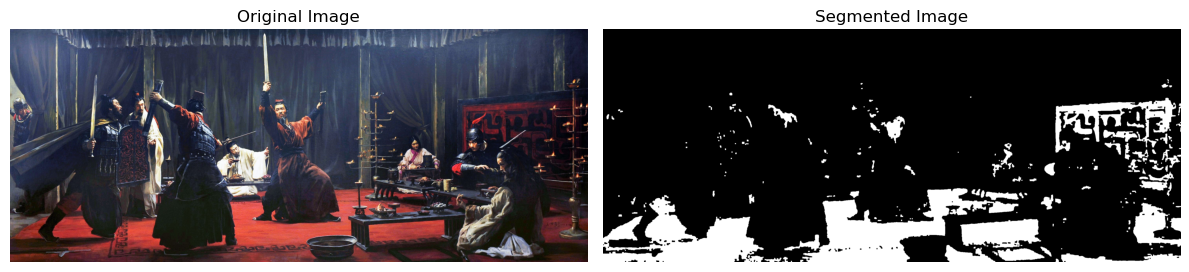

In [9]:
image_path = r"D:\Twitter pics\Twitter\hongmen_banquet.jpg"
lower1 = np.array([0, 100, 20])
upper1 = np.array([10, 255, 255])

lower2 = np.array([160, 100, 20])
upper2 = np.array([179, 255, 255])

original, segmented = segment_image(image_path, lower1, upper1, lower2, upper2)